In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import requests
import geojson
import json 

%matplotlib inline

In [2]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [3]:
Authorization = credentials['Authorization']

In [4]:
def concat_frames(geo_response, response):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    return full_df

In [5]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/56'

params_JunetoJuly_AMPeak = {
    'direction': '1',
    'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates': '07-04-2022'
}

params_geo_JunetoJuly_AMPeak  = {
    'direction': '1',
    'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'resolution': 'hiRes',
    'excludeDates': '07-04-2022'
}

params_JunetoJuly_PMPeak = {
    'direction': '0',
    'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'excludeDates': '07-04-2022'
}

params_geo_JunetoJuly_PMPeak  = {
    'direction': '0',
   'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'format'   : 'geojson',
    'resolution': 'hiRes',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'excludeDates': '07-04-2022'
}



headers = {'Authorization': Authorization,
         'Content-Type': 'application/json'}

In [6]:
Route56_JunetoJuly_AMPeak = concat_frames(requests.get(URL, params = params_geo_JunetoJuly_AMPeak, headers = headers), requests.get(URL, params = params_JunetoJuly_AMPeak, headers = headers))
Route56_JunetoJuly_AMPeak

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.930047,12.143228,12.022,2.773,2.290,2.023,1.6730,1.504,1.347,1.131,358,1.413
1,"LINESTRING (-86.73448 36.20905, -86.73461 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.664961,14.191323,4.925,1.950,1.826,1.766,1.6350,1.511,1.363,0.992,355,1.457
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.239657,10.693155,9.982,3.293,2.638,2.253,1.9510,1.753,1.573,1.304,350,1.680
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.411268,7.254780,8.624,5.888,4.636,4.222,3.1400,2.261,1.548,0.675,194,1.884
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.303060,7.229054,44.786,4.925,3.662,3.309,2.6525,2.304,1.976,1.328,368,2.163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.378656,10.345758,13.222,3.765,2.672,2.203,1.8930,1.700,1.521,1.175,358,1.617
730,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.845089,12.980946,7.831,2.252,2.017,1.915,1.7610,1.642,1.493,1.229,348,1.565
731,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.667636,14.855160,9.042,2.261,1.812,1.650,1.4985,1.359,1.222,1.024,360,1.289
732,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,4.952094,4.821799,16.399,7.233,6.107,5.441,4.5120,3.838,3.175,1.430,363,3.530


In [7]:
Route56_JunetoJuly_AMPeak['date range'] = 'June 26th - July 26th, 2022'
Route56_JunetoJuly_AMPeak['Weekdays'] = 'Monday through Friday'
Route56_JunetoJuly_AMPeak['Hours'] = '06:00 - 09:00'
Route56_JunetoJuly_AMPeak['direction'] = 'inbound'
Route56_JunetoJuly_AMPeak

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,date range,Weekdays,Hours,direction
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.930047,12.143228,12.022,2.773,...,1.6730,1.504,1.347,1.131,358,1.413,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
1,"LINESTRING (-86.73448 36.20905, -86.73461 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.664961,14.191323,4.925,1.950,...,1.6350,1.511,1.363,0.992,355,1.457,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.239657,10.693155,9.982,3.293,...,1.9510,1.753,1.573,1.304,350,1.680,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.411268,7.254780,8.624,5.888,...,3.1400,2.261,1.548,0.675,194,1.884,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.303060,7.229054,44.786,4.925,...,2.6525,2.304,1.976,1.328,368,2.163,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.378656,10.345758,13.222,3.765,...,1.8930,1.700,1.521,1.175,358,1.617,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
730,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.845089,12.980946,7.831,2.252,...,1.7610,1.642,1.493,1.229,348,1.565,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
731,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.667636,14.855160,9.042,2.261,...,1.4985,1.359,1.222,1.024,360,1.289,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
732,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,4.952094,4.821799,16.399,7.233,...,4.5120,3.838,3.175,1.430,363,3.530,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound


In [8]:
Route56_JunetoJuly_PMPeak = concat_frames(requests.get(URL, params = params_geo_JunetoJuly_PMPeak, headers = headers), requests.get(URL, params = params_JunetoJuly_PMPeak, headers = headers))
Route56_JunetoJuly_PMPeak

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,2.994040,8.146184,47.610,5.061,3.454,2.703,1.8490,1.541,1.337,1.055,405,1.458
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,2.219608,11.187111,20.948,3.353,2.367,2.003,1.7605,1.618,1.456,1.079,424,1.549
2,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.698958,9.070538,31.143,3.758,2.829,2.526,2.1600,1.897,1.609,0.844,409,1.748
3,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,8.615458,2.899788,96.745,21.562,14.007,8.824,2.9270,1.605,1.378,1.082,426,1.499
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,3.060245,8.079745,47.689,4.352,3.522,3.088,2.4925,2.082,1.743,0.911,440,1.887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.496414,9.870959,19.432,3.676,2.795,2.446,2.1140,1.857,1.578,1.195,415,1.738
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.844300,6.393362,41.361,7.323,4.009,2.987,2.4565,2.187,1.878,1.125,426,2.043
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,4.479337,5.461299,38.142,12.701,4.324,2.566,1.9830,1.740,1.515,1.256,421,1.643
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.982319,12.153947,8.012,2.897,2.249,2.065,1.7620,1.602,1.447,1.202,408,1.528


In [9]:
Route56_JunetoJuly_PMPeak['date range'] = 'June 26th - July 26th, 2022'
Route56_JunetoJuly_PMPeak['Weekdays'] = 'Monday through Friday'
Route56_JunetoJuly_PMPeak['Hours'] = '14:30 - 018:00'
Route56_JunetoJuly_PMPeak['direction'] = 'outbound'
Route56_JunetoJuly_PMPeak

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,date range,Weekdays,Hours,direction
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,2.994040,8.146184,47.610,5.061,...,1.8490,1.541,1.337,1.055,405,1.458,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,2.219608,11.187111,20.948,3.353,...,1.7605,1.618,1.456,1.079,424,1.549,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
2,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.698958,9.070538,31.143,3.758,...,2.1600,1.897,1.609,0.844,409,1.748,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
3,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,8.615458,2.899788,96.745,21.562,...,2.9270,1.605,1.378,1.082,426,1.499,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,3.060245,8.079745,47.689,4.352,...,2.4925,2.082,1.743,0.911,440,1.887,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.496414,9.870959,19.432,3.676,...,2.1140,1.857,1.578,1.195,415,1.738,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.844300,6.393362,41.361,7.323,...,2.4565,2.187,1.878,1.125,426,2.043,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,4.479337,5.461299,38.142,12.701,...,1.9830,1.740,1.515,1.256,421,1.643,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.982319,12.153947,8.012,2.897,...,1.7620,1.602,1.447,1.202,408,1.528,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound


In [10]:
Route56_JunetoJuly_Weekdays = pd.concat([Route56_JunetoJuly_AMPeak, 
           Route56_JunetoJuly_PMPeak])
Route56_JunetoJuly_Weekdays

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,date range,Weekdays,Hours,direction
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.930047,12.143228,12.022,2.773,...,1.6730,1.504,1.347,1.131,358,1.413,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
1,"LINESTRING (-86.73448 36.20905, -86.73461 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.664961,14.191323,4.925,1.950,...,1.6350,1.511,1.363,0.992,355,1.457,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.239657,10.693155,9.982,3.293,...,1.9510,1.753,1.573,1.304,350,1.680,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.411268,7.254780,8.624,5.888,...,3.1400,2.261,1.548,0.675,194,1.884,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.303060,7.229054,44.786,4.925,...,2.6525,2.304,1.976,1.328,368,2.163,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.496414,9.870959,19.432,3.676,...,2.1140,1.857,1.578,1.195,415,1.738,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.844300,6.393362,41.361,7.323,...,2.4565,2.187,1.878,1.125,426,2.043,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,4.479337,5.461299,38.142,12.701,...,1.9830,1.740,1.515,1.256,421,1.643,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.982319,12.153947,8.012,2.897,...,1.7620,1.602,1.447,1.202,408,1.528,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound


In [22]:
Route56_JunetoJuly_Weekday_StopCount = Route56_JunetoJuly_Weekdays['countForSegment'].max()
Route56_JunetoJuly_Weekdays_Trimmed = Route56_JunetoJuly_Weekdays[Route56_JunetoJuly_Weekdays['countForSegment']> Route56_JunetoJuly_Weekday_StopCount/2]
Route56_JunetoJuly_Weekdays_Trimmed_Inbound = Route56_JunetoJuly_Weekdays_Trimmed[Route56_JunetoJuly_Weekdays_Trimmed['direction']=='inbound']
Route56_JunetoJuly_Weekdays_Trimmed_Inbound

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,date range,Weekdays,Hours,direction
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.930047,12.143228,12.022,2.773,...,1.6730,1.504,1.347,1.131,358,1.413,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
1,"LINESTRING (-86.73448 36.20905, -86.73461 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.664961,14.191323,4.925,1.950,...,1.6350,1.511,1.363,0.992,355,1.457,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.239657,10.693155,9.982,3.293,...,1.9510,1.753,1.573,1.304,350,1.680,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.303060,7.229054,44.786,4.925,...,2.6525,2.304,1.976,1.328,368,2.163,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
5,"LINESTRING (-86.75448 36.17705, -86.75473 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,2.441329,10.152257,5.745,3.964,...,2.0950,1.843,1.656,1.216,353,1.755,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.378656,10.345758,13.222,3.765,...,1.8930,1.700,1.521,1.175,358,1.617,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
730,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.845089,12.980946,7.831,2.252,...,1.7610,1.642,1.493,1.229,348,1.565,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
731,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.667636,14.855160,9.042,2.261,...,1.4985,1.359,1.222,1.024,360,1.289,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
732,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,4.952094,4.821799,16.399,7.233,...,4.5120,3.838,3.175,1.430,363,3.530,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound


In [23]:
Route56_JJ_Inbound_desc = Route56_JunetoJuly_Weekdays_Trimmed_Inbound.describe()
Route56_JJ_Inbound_desc

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,24.320855,3.066897,11.669498,31.120355,5.612245,3.766116,2.909955,2.162649,1.787516,1.508281,1.062459,357.205479,1.655359
std,0.456660,5.700228,4.205394,79.396893,13.246816,9.159685,6.865819,4.049334,1.967361,0.916630,0.256007,8.847370,1.456736
min,22.655000,1.293159,0.241346,1.935000,1.504000,1.419000,1.352000,1.268500,1.197000,1.076000,0.345000,261.000000,1.146000
25%,23.945000,1.663765,9.328101,4.413000,2.034000,1.809250,1.683750,1.542250,1.433000,1.292250,0.992000,353.000000,1.368250
50%,24.524000,1.961165,12.349700,7.570000,2.567000,2.169500,1.940000,1.742500,1.588000,1.423000,1.111500,358.000000,1.519000
75%,24.685000,2.595619,14.630736,24.092250,4.084000,2.933500,2.464500,1.998875,1.775000,1.553750,1.216000,361.000000,1.671750
max,24.913000,99.007395,19.022409,917.723000,220.736000,188.435000,146.660000,76.608500,43.163000,22.689000,1.618000,371.000000,34.258000


In [25]:
low_outlier = Route56_JJ_Inbound_desc.loc['25%','percent20Secs']-(1.5 * (Route56_JJ_desc.loc['75%','percent20Secs']-Route56_JJ_desc.loc['25%','percent20Secs']))
high_outlier = Route56_JJ_Inbound_desc.loc['75%','percent20Secs']+(1.5 * (Route56_JJ_desc.loc['75%','percent20Secs']-Route56_JJ_desc.loc['25%','percent20Secs']))
print(low_outlier)
print(high_outlier)

0.7585000000000004
2.2814999999999994


In [34]:
print(Route56_JunetoJuly_Weekdays_Trimmed_Inbound['percent20Secs'].quantile(q=0.8))
quartile25 = Route56_JJ_Inbound_desc.loc['25%','percent20Secs']
quartile75 = Route56_JJ_Inbound_desc.loc['75%','percent20Secs']
print(quartile25)
print(quartile75)

1.7106000000000001
1.3682500000000002
1.6717499999999998


In [40]:
Route56_JunetoJuly_Weekdays_Trimmed_Inbound_q80 = (Route56_JunetoJuly_Weekdays_Trimmed_Inbound[
    Route56_JunetoJuly_Weekdays_Trimmed_Inbound['percent20Secs']> 
    Route56_JunetoJuly_Weekdays_Trimmed_Inbound['percent20Secs'].quantile(q=0.8)])
Route56_JunetoJuly_Weekdays_Trimmed_Inbound_q80.sort_values(by='percent20Secs',ascending=False).reset_index(drop=True)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,date range,Weekdays,Hours,direction
0,"LINESTRING (-86.78159 36.16633, -86.78182 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,96.832855,0.246590,917.723,182.358,...,76.6085,43.163,22.689,0.345,304,34.258,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
1,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,28.108621,0.849490,870.945,31.558,...,20.1450,16.518,10.248,0.345,327,14.912,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
2,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,99.007395,0.241346,504.931,220.736,...,76.0290,27.979,4.496,1.405,354,14.720,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
3,"LINESTRING (-86.78111 36.16652, -86.78135 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,12.487973,1.912080,76.090,18.464,...,12.3680,9.470,5.049,0.345,337,7.844,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
4,"LINESTRING (-86.78091 36.16663, -86.78111 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,7.376627,3.236981,30.719,10.115,...,7.3090,6.036,4.567,0.345,343,5.424,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,"LINESTRING (-86.72056 36.24771, -86.72069 36.2...",GXIDUESN,Due West Station Inbound,GALBERWF,S Gallatin Pike & Berkley Dr Sb,23.544,2.216392,10.622670,5.848,2.993,...,2.0245,1.813,1.571,1.193,362,1.714,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
142,"LINESTRING (-86.73328 36.21070, -86.73342 36.2...",GALGILSF,Gallatin Pike & Gilock St Sb,GXIGREEF,Greenfield Station Inbound,23.945,3.284597,7.290088,49.193,6.043,...,2.4480,1.894,1.595,1.070,355,1.714,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
143,"LINESTRING (-86.74789 36.18491, -86.74798 36.1...",GALPETSN,Gallatin Ave & Petway Ave,GXIEASTN,Eastland Station Inbound,24.039,2.785777,8.629190,44.452,4.588,...,2.0950,1.805,1.562,1.084,355,1.714,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound
144,"LINESTRING (-86.73892 36.20285, -86.73903 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.360940,10.143841,12.058,3.463,...,1.9880,1.795,1.615,1.214,351,1.713,"June 26th - July 26th, 2022",Monday through Friday,06:00 - 09:00,inbound


In [16]:
#Route56_JunetoJuly_lowtravelspeeds = Route56_JunetoJuly_Weekdays_q25.groupby(
                             #   ['geometry','direction'])['averageTravelSpeed'].mean().to_frame()
#Route56_JunetoJuly_lowtravelspeeds = Route56_JunetoJuly_lowtravelspeeds
#Route56_JunetoJuly_lowtravelspeeds.sort_values(by='averageTravelSpeed').reset_index()

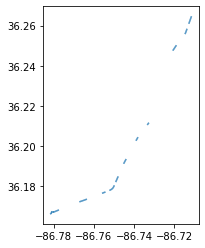

In [41]:
Route56_JunetoJuly_Weekdays_Trimmed_Inbound_q80.plot();

In [43]:
Route56_JunetoJuly_Weekdays_Trimmed_Outbound = Route56_JunetoJuly_Weekdays_Trimmed[Route56_JunetoJuly_Weekdays_Trimmed['direction']=='outbound']
Route56_JunetoJuly_Weekdays_Trimmed_Outbound

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,date range,Weekdays,Hours,direction
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,2.994040,8.146184,47.610,5.061,...,1.8490,1.541,1.337,1.055,405,1.458,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,2.219608,11.187111,20.948,3.353,...,1.7605,1.618,1.456,1.079,424,1.549,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
2,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.698958,9.070538,31.143,3.758,...,2.1600,1.897,1.609,0.844,409,1.748,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
3,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,8.615458,2.899788,96.745,21.562,...,2.9270,1.605,1.378,1.082,426,1.499,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,3.060245,8.079745,47.689,4.352,...,2.4925,2.082,1.743,0.911,440,1.887,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.496414,9.870959,19.432,3.676,...,2.1140,1.857,1.578,1.195,415,1.738,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.844300,6.393362,41.361,7.323,...,2.4565,2.187,1.878,1.125,426,2.043,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,4.479337,5.461299,38.142,12.701,...,1.9830,1.740,1.515,1.256,421,1.643,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.982319,12.153947,8.012,2.897,...,1.7620,1.602,1.447,1.202,408,1.528,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound


In [46]:
Route56_JunetoJuly_Weekdays_Trimmed_Outbound_Peakq80 = (Route56_JunetoJuly_Weekdays_Trimmed_Outbound[
    Route56_JunetoJuly_Weekdays_Trimmed_Outbound['percent20Secs']> 
    Route56_JunetoJuly_Weekdays_Trimmed_Outbound['percent20Secs'].quantile(q=0.8)])
Route56_JunetoJuly_Weekdays_Trimmed_Outbound_Peakq80.sort_values(by='percent20Secs',ascending=False).reset_index(drop=True)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,date range,Weekdays,Hours,direction
0,"LINESTRING (-86.68593 36.30793, -86.68616 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,58.642798,0.417460,856.649,110.504,...,38.4690,26.270,11.768,0.711,396,20.622,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
1,"LINESTRING (-86.69531 36.30058, -86.69554 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,304.967949,0.080802,1390.080,621.039,...,302.1720,93.499,5.530,1.586,311,14.552,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
2,"LINESTRING (-86.71419 36.25652, -86.71411 36.2...",GXOMADWG,Madison Station Outbound,GALMAPNF,Gallatin Pike & Maple St Nb,24.574,66.561386,0.369193,521.183,183.712,...,33.7405,14.518,4.421,1.689,422,8.337,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
3,"LINESTRING (-86.71237 36.26162, -86.71230 36.2...",GALMAPNF,Gallatin Pike & Maple St Nb,GALOLDNM,Gallatin Pike & Old Hickory Nb,24.282,24.030944,1.010447,455.482,51.251,...,16.2445,10.482,6.125,2.389,410,8.329,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
4,"LINESTRING (-86.68661 36.30757, -86.68667 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,18.443211,1.327372,314.330,34.421,...,14.2995,8.306,6.048,0.711,408,7.095,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,"LINESTRING (-86.75696 36.17602, -86.75673 36.1...",GXO7AVEF,Main Street Station Outbound,MAIMCFEN,Main St & Mcferrin Ave Eb,22.819,2.670746,8.544055,13.503,3.610,...,2.5400,2.256,1.807,1.357,410,2.044,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
164,"LINESTRING (-86.71947 36.24919, -86.71934 36.2...",GXODUEWF,Due West Station Outbound,GALEMMNN,Gallatin Pike & Emmitt Ave Nb,24.866,8.340254,2.981444,63.185,27.544,...,2.9410,2.279,1.857,1.443,425,2.044,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
165,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.844300,6.393362,41.361,7.323,...,2.4565,2.187,1.878,1.125,426,2.043,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound
166,"LINESTRING (-86.69353 36.30155, -86.69333 36.3...",GXORIVEN,Rivergate Station Outbound,GALCONNN,Gallatin Pike & Conference Dr Nb,23.603,3.232194,7.302470,32.606,4.882,...,2.6085,2.180,1.814,1.457,396,2.033,"June 26th - July 26th, 2022",Monday through Friday,14:30 - 018:00,outbound


<AxesSubplot:>

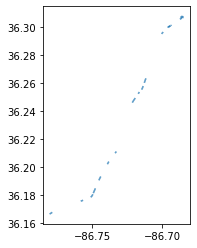

In [47]:
Route56_JunetoJuly_Weekdays_Trimmed_Outbound_Peakq80.plot()

In [42]:
def concat_frames_columns(geo_response, response, date_range, time_range='6am-9am', days='m-f', in_or_out='inbound'):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    full_df['dates'] = date_range
    full_df['time'] = time_range
    full_df['days_of_week'] = days
    full_df['direction']= in_or_out
    full_df['max_seg_count'] = full_df['countForSegment'].max()
    full_df['proportion_of_segments'] = full_df['countForSegment']/full_df['max_seg_count']
    return full_df

In [ ]:
#trial = concat_frames_columns(requests.get(URL, params = params, headers = headers), 
 #                             requests.get(URL, params = params1, headers = headers), '01/25/22-02/24/22')

In [57]:
params_JunetoJuly_OffPeak_Inbound = {
    'direction': '1',
    'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'excludeDates': '07-04-2022'
}

params_geo_JunetoJuly_OffPeak_Inbound  = {
    'direction': '1',
    'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'format' : 'geojson',
    'excludeDates': '07-04-2022'
}

params_JunetoJuly_OffPeak_Outbound = {
    'direction': '0',
    'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'excludeDates': '07-04-2022'
}

params_geo_JunetoJuly_OffPeak_Outbound  = {
    'direction': '0',
    'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'format' : 'geojson',
    'excludeDates': '07-04-2022'
}




In [59]:
Route56_JunetoJuly_OffPeak_In = concat_frames_columns(requests.get(URL, params = params_geo_JunetoJuly_OffPeak_Inbound,
                                        headers = headers),requests.get(URL, params=params_JunetoJuly_OffPeak_Inbound,
                                        headers=headers),'06/26/2022-07/26/2022','09:00-14:30',
                                        'Monday - Friday','inbound')
Route56_JunetoJuly_OffPeak_In

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,3.225918,7.265219,37.729,4.669,...,1.510,1.129,668,1.605,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.979472
1,"LINESTRING (-86.73448 36.20905, -86.73461 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.996071,11.837254,151.904,2.098,...,1.428,1.005,675,1.520,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.989736
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.173458,11.018846,9.148,3.085,...,1.587,1.324,666,1.686,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.976540
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.561946,6.947887,15.001,6.263,...,1.538,0.546,313,1.882,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.458944
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.984837,7.999767,37.655,4.267,...,1.714,1.251,664,2.002,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.973607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.894886,8.500853,19.567,4.823,...,1.581,1.204,675,1.700,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.989736
730,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.918142,12.486563,23.216,2.306,...,1.526,1.223,669,1.607,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.980938
731,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.584000,15.639520,5.616,1.926,...,1.253,0.961,681,1.325,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.998534
732,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,5.825416,4.098935,45.710,7.987,...,3.924,1.015,649,4.344,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.951613


In [60]:
Route56_JunetoJuly_OffPeak_Out = concat_frames_columns(requests.get(URL, params = params_geo_JunetoJuly_OffPeak_Outbound,
                                        headers = headers),requests.get(URL, params=params_JunetoJuly_OffPeak_Outbound,
                                        headers=headers),'06/26/2022-07/26/2022','09:00-14:30',
                                        'Monday - Friday','outbound')
Route56_JunetoJuly_OffPeak_Out

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,1.749233,14.195364,7.425,2.059,...,1.432,1.207,669,1.499,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.982379
1,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,2.443466,9.981723,38.036,3.907,...,1.342,0.762,650,1.413,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.954479
2,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,3.798075,6.577806,171.632,6.516,...,1.291,0.866,668,1.355,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.980910
3,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.796091,8.755438,12.165,4.389,...,1.639,0.667,667,1.809,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.979442
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.306229,10.721398,6.894,3.250,...,1.658,1.080,673,1.792,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.988253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,2.894974,8.489886,24.379,5.017,...,1.731,0.842,658,1.853,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.966226
835,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.521799,9.771596,56.399,3.466,...,1.656,0.917,656,1.813,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.963289
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,4.118709,5.939482,47.354,9.537,...,1.530,1.112,670,1.641,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.983847
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.850283,13.021251,8.209,2.522,...,1.417,1.185,672,1.492,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.986784


In [61]:
Route56_JunetoJuly_Weekdays_OffPeak = pd.concat([Route56_JunetoJuly_OffPeak_In, 
           Route56_JunetoJuly_OffPeak_Out])
Route56_JunetoJuly_Weekdays_OffPeak

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,3.225918,7.265219,37.729,4.669,...,1.510,1.129,668,1.605,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.979472
1,"LINESTRING (-86.73448 36.20905, -86.73461 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.996071,11.837254,151.904,2.098,...,1.428,1.005,675,1.520,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.989736
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.173458,11.018846,9.148,3.085,...,1.587,1.324,666,1.686,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.976540
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.561946,6.947887,15.001,6.263,...,1.538,0.546,313,1.882,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.458944
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.984837,7.999767,37.655,4.267,...,1.714,1.251,664,2.002,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.973607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,2.894974,8.489886,24.379,5.017,...,1.731,0.842,658,1.853,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.966226
835,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.521799,9.771596,56.399,3.466,...,1.656,0.917,656,1.813,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.963289
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,4.118709,5.939482,47.354,9.537,...,1.530,1.112,670,1.641,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.983847
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.850283,13.021251,8.209,2.522,...,1.417,1.185,672,1.492,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.986784


In [62]:
Route56_JunetoJuly_OffPeak_StopCount = Route56_JunetoJuly_Weekdays_OffPeak['countForSegment'].max()
Route56_JunetoJuly_Weekdays_OffPeak_Trimmed = Route56_JunetoJuly_Weekdays_OffPeak[Route56_JunetoJuly_Weekdays_OffPeak['countForSegment']> Route56_JunetoJuly_OffPeak_StopCount/2]
Route56_JunetoJuly_Weekdays_OffPeak_Trimmed

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,3.225918,7.265219,37.729,4.669,...,1.510,1.129,668,1.605,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.979472
1,"LINESTRING (-86.73448 36.20905, -86.73461 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.996071,11.837254,151.904,2.098,...,1.428,1.005,675,1.520,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.989736
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.173458,11.018846,9.148,3.085,...,1.587,1.324,666,1.686,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.976540
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.984837,7.999767,37.655,4.267,...,1.714,1.251,664,2.002,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.973607
5,"LINESTRING (-86.75448 36.17705, -86.75473 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,2.321543,10.676089,9.164,3.597,...,1.648,0.885,668,1.754,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.979472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,2.894974,8.489886,24.379,5.017,...,1.731,0.842,658,1.853,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.966226
835,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.521799,9.771596,56.399,3.466,...,1.656,0.917,656,1.813,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.963289
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,4.118709,5.939482,47.354,9.537,...,1.530,1.112,670,1.641,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.983847
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.850283,13.021251,8.209,2.522,...,1.417,1.185,672,1.492,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.986784


In [63]:
Route56_JunetoJuly_Weekdays_OffPeak_Trimmedq80 = (Route56_JunetoJuly_Weekdays_OffPeak_Trimmed[
    Route56_JunetoJuly_Weekdays_OffPeak_Trimmed['percent20Secs']> 
    Route56_JunetoJuly_Weekdays_OffPeak_Trimmed['percent20Secs'].quantile(q=0.8)])
Route56_JunetoJuly_Weekdays_OffPeak_Trimmedq80.sort_values(by='percent20Secs',ascending=False).reset_index(drop=True)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78159 36.16633, -86.78182 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,97.771197,0.244223,1552.000,198.466,...,15.666,2.420,547,32.512,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.802053
1,"LINESTRING (-86.69531 36.30058, -86.69554 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,395.250556,0.062345,1474.699,738.174,...,11.774,2.349,523,22.749,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.767988
2,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,112.034781,0.213282,732.456,246.283,...,8.308,1.466,670,20.382,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.982405
3,"LINESTRING (-86.68593 36.30793, -86.68616 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,98.907715,0.247514,1427.904,193.292,...,7.631,0.667,671,14.872,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.985316
4,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,25.358193,0.941629,279.152,37.330,...,7.954,2.358,574,14.777,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.841642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,"LINESTRING (-86.76383 36.17337, -86.76358 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,10.422664,2.372330,485.256,20.954,...,1.748,0.969,673,1.882,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.988253
309,"LINESTRING (-86.73388 36.20972, -86.73374 36.2...",GALIVENN,Gallatin Pike & Iverson Ave Nb,GXOGREEN,Greenfield Station Outbound,24.253,3.591202,6.753449,37.227,6.712,...,1.685,1.186,663,1.881,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.973568
310,"LINESTRING (-86.71676 36.25329, -86.71690 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,3.473795,7.084183,10.663,6.045,...,1.636,1.204,674,1.879,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,inbound,682,0.988270
311,"LINESTRING (-86.69333 36.30169, -86.69313 36.3...",GXORIVEN,Rivergate Station Outbound,GALCONNN,Gallatin Pike & Conference Dr Nb,23.603,3.382910,6.977129,37.200,5.063,...,1.683,1.282,670,1.878,06/26/2022-07/26/2022,09:00-14:30,Monday - Friday,outbound,681,0.983847


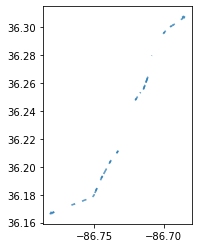

In [64]:
Route56_JunetoJuly_Weekdays_OffPeak_Trimmedq80.plot();

In [70]:
params_JunetoJuly_Evening_Inbound = {
    'direction': '1',
    'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'excludeDates': '07-04-2022'
}

params_geo_JunetoJuly_Evening_Inbound  = {
    'direction': '1',
    'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '07-04-2022'
}

params_JunetoJuly_Evening_Outbound = {
    'direction': '0',
    'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'excludeDates': '07-04-2022'
}

params_geo_JunetoJuly_Evening_Outbound  = {
    'direction': '0',
    'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '07-04-2022'
}

In [72]:
Route56_JunetoJuly_Evening_Inbound = concat_frames_columns(requests.get(URL, params = params_geo_JunetoJuly_Evening_Inbound,
                                        headers = headers),requests.get(URL, params=params_JunetoJuly_Evening_Inbound,
                                        headers=headers),'06/26/2022-07/26/2022','18:00-23:59',
                                        'Monday - Friday','inbound')
Route56_JunetoJuly_Evening_Inbound

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,2.653270,8.833251,40.820,3.841,...,1.445,1.056,322,1.607,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.870270
1,"LINESTRING (-86.73448 36.20905, -86.73461 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.721649,13.724052,2.628,2.088,...,1.395,0.870,365,1.505,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.986486
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.101126,11.398174,4.932,2.939,...,1.597,1.250,365,1.697,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.986486
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.412940,7.251226,8.410,5.284,...,1.609,0.866,117,1.926,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.316216
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.799217,8.530243,11.718,4.306,...,1.601,1.077,359,1.810,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.970270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.299727,10.700835,16.415,3.175,...,1.522,1.079,348,1.636,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.940541
730,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.851224,12.937926,4.387,2.249,...,1.470,1.115,366,1.584,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.989189
731,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.677642,14.766559,8.356,2.046,...,1.311,1.050,349,1.393,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.943243
732,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,5.784904,4.127640,27.441,7.954,...,3.981,2.598,343,4.375,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.927027


In [73]:
Route56_JunetoJuly_Evening_Outbound = concat_frames_columns(requests.get(URL, params = params_geo_JunetoJuly_Evening_Outbound,
                                        headers = headers),requests.get(URL, params=params_JunetoJuly_Evening_Outbound,
                                        headers=headers),'06/26/2022-07/26/2022','18:00-23:59',
                                        'Monday - Friday','outbound')
Route56_JunetoJuly_Evening_Outbound

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,3.028502,8.053487,56.417,5.103,...,1.261,0.984,450,1.356,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.955414
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,1.747024,14.213314,5.391,2.118,...,1.398,1.021,422,1.475,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.895966
2,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.225855,10.998470,9.227,2.885,...,1.484,0.859,461,1.609,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.978769
3,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,6.785876,3.681618,158.294,18.094,...,1.327,0.950,426,1.419,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.904459
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.544958,9.715681,8.074,4.001,...,1.651,1.116,405,1.771,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.859873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.037775,12.092601,10.009,2.866,...,1.303,1.001,454,1.442,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.963907
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.377023,7.278008,50.138,5.579,...,1.738,1.217,426,1.901,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.904459
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,3.664255,6.676118,34.352,10.197,...,1.378,0.949,423,1.482,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.898089
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.839354,13.098620,4.046,2.453,...,1.414,1.027,455,1.505,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.966030


In [74]:
Route56_JunetoJuly_Evening = pd.concat([Route56_JunetoJuly_Evening_Inbound, 
           Route56_JunetoJuly_Evening_Outbound])
Route56_JunetoJuly_Evening

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,2.653270,8.833251,40.820,3.841,...,1.445,1.056,322,1.607,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.870270
1,"LINESTRING (-86.73448 36.20905, -86.73461 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.721649,13.724052,2.628,2.088,...,1.395,0.870,365,1.505,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.986486
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.101126,11.398174,4.932,2.939,...,1.597,1.250,365,1.697,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.986486
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.412940,7.251226,8.410,5.284,...,1.609,0.866,117,1.926,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.316216
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.799217,8.530243,11.718,4.306,...,1.601,1.077,359,1.810,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.970270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.037775,12.092601,10.009,2.866,...,1.303,1.001,454,1.442,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.963907
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.377023,7.278008,50.138,5.579,...,1.738,1.217,426,1.901,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.904459
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,3.664255,6.676118,34.352,10.197,...,1.378,0.949,423,1.482,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.898089
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.839354,13.098620,4.046,2.453,...,1.414,1.027,455,1.505,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.966030


In [75]:
Route56_JunetoJuly_Evening_StopCount = Route56_JunetoJuly_Evening['countForSegment'].max()
Route56_JunetoJuly_Evening_Trimmed = Route56_JunetoJuly_Evening[Route56_JunetoJuly_Evening['countForSegment']> Route56_JunetoJuly_Evening_StopCount/2]
Route56_JunetoJuly_Evening_Trimmed

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,2.653270,8.833251,40.820,3.841,...,1.445,1.056,322,1.607,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.870270
1,"LINESTRING (-86.73448 36.20905, -86.73461 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.721649,13.724052,2.628,2.088,...,1.395,0.870,365,1.505,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.986486
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.101126,11.398174,4.932,2.939,...,1.597,1.250,365,1.697,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.986486
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.799217,8.530243,11.718,4.306,...,1.601,1.077,359,1.810,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.970270
5,"LINESTRING (-86.75448 36.17705, -86.75473 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,2.435369,10.177103,16.242,3.499,...,1.668,1.162,366,1.816,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.989189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.037775,12.092601,10.009,2.866,...,1.303,1.001,454,1.442,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.963907
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.377023,7.278008,50.138,5.579,...,1.738,1.217,426,1.901,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.904459
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,3.664255,6.676118,34.352,10.197,...,1.378,0.949,423,1.482,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.898089
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.839354,13.098620,4.046,2.453,...,1.414,1.027,455,1.505,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.966030


In [76]:
Route56_JunetoJuly_Evening_Trimmedq80 = (Route56_JunetoJuly_Evening_Trimmed[
    Route56_JunetoJuly_Evening_Trimmed['percent20Secs']> 
    Route56_JunetoJuly_Evening_Trimmed['percent20Secs'].quantile(q=0.8)])
Route56_JunetoJuly_Evening_Trimmedq80.sort_values(by='percent20Secs',ascending=False).reset_index(drop=True)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78159 36.16633, -86.78182 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,66.472255,0.359218,762.528,90.067,...,22.506,2.377,294,29.955,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.794595
1,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,25.790198,0.925856,654.123,25.108,...,9.391,2.377,308,13.716,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.832432
2,"LINESTRING (-86.68593 36.30793, -86.68616 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,49.414860,0.495418,900.493,97.961,...,6.423,0.870,457,13.195,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.970276
3,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,73.337447,0.325823,418.821,183.359,...,2.282,1.105,347,10.579,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.937838
4,"LINESTRING (-86.78111 36.16652, -86.78135 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,12.573968,1.899003,185.031,18.154,...,4.642,2.377,308,7.021,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.832432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"LINESTRING (-86.73342 36.21051, -86.73355 36.2...",GALGILSF,Gallatin Pike & Gilock St Sb,GXIGREEF,Greenfield Station Inbound,23.945,16.932936,1.414108,185.741,47.137,...,1.606,1.270,362,1.802,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.978378
307,"LINESTRING (-86.76594 36.17269, -86.76619 36.1...",MAI5STWN,Main St & 5th St Wb,JAMGAYWF,James Robertson Pkwy & Gay St Wb,24.856,2.342711,10.609930,4.730,3.229,...,1.657,1.128,363,1.801,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,inbound,370,0.981081
308,"LINESTRING (-86.71760 36.25193, -86.71747 36.2...",GXODUEWF,Due West Station Outbound,GALEMMNN,Gallatin Pike & Emmitt Ave Nb,24.866,2.326590,10.687745,8.600,3.155,...,1.650,1.273,434,1.799,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.921444
309,"LINESTRING (-86.71507 36.25513, -86.71490 36.2...",GALEMMNN,Gallatin Pike & Emmitt Ave Nb,GXOMADWG,Madison Station Outbound,24.907,2.593920,9.602069,30.706,3.743,...,1.693,1.422,438,1.799,06/26/2022-07/26/2022,18:00-23:59,Monday - Friday,outbound,471,0.929936


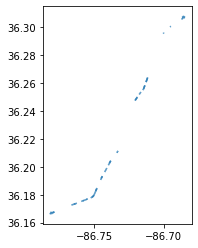

In [85]:
Route56_JunetoJuly_Evening_Trimmedq80.plot();

In [78]:
params_JunetoJuly_Morning_Inbound = {
    'direction': '1',
    'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'excludeDates': '07-04-2022'
}

params_geo_JunetoJuly_Morning_Inbound  = {
    'direction': '1',
    'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'format' : 'geojson',
    'excludeDates': '07-04-2022'
}

params_JunetoJuly_Morning_Outbound = {
    'direction': '0',
    'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'excludeDates': '07-04-2022'
}

params_geo_JunetoJuly_Morning_Outbound  = {
    'direction': '0',
    'startDate': '06-26-2022',
    'endDate': '07-26-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'format' : 'geojson',
    'excludeDates': '07-04-2022'
}

In [79]:
Route56_JunetoJuly_Morning_Inbound = concat_frames_columns(requests.get(URL, params = params_geo_JunetoJuly_Morning_Inbound,
                                        headers = headers),requests.get(URL, params=params_JunetoJuly_Morning_Inbound,
                                        headers=headers),'06/26/2022-07/26/2022','00:00-06:00',
                                        'Monday - Friday','inbound')
Route56_JunetoJuly_Morning_Inbound

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,2.007455,11.674982,4.164,2.953,...,1.367,1.061,121,1.471,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.923664
1,"LINESTRING (-86.73448 36.20905, -86.73461 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.633740,14.462522,2.703,1.948,...,1.339,1.202,96,1.415,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.732824
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.020947,11.850385,5.179,2.910,...,1.529,1.180,94,1.596,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.717557
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,2.955695,8.372988,8.294,5.601,...,1.496,0.806,131,1.710,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,1.000000
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.644690,9.028657,5.820,3.909,...,1.592,1.283,71,1.835,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.541985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,1.856106,13.258402,3.543,2.381,...,1.502,1.224,113,1.549,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.862595
730,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.738914,13.773539,2.576,2.209,...,1.442,1.252,93,1.512,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.709924
731,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.493357,16.588800,2.351,1.811,...,1.230,1.093,98,1.264,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.748092
732,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,4.842208,4.931221,8.976,6.758,...,3.169,2.595,72,3.595,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.549618


In [80]:
Route56_JunetoJuly_Morning_Outbound = concat_frames_columns(requests.get(URL, params = params_geo_JunetoJuly_Morning_Outbound,
                                        headers = headers),requests.get(URL, params=params_JunetoJuly_Morning_Outbound,
                                        headers=headers),'06/26/2022-07/26/2022','00:00-06:00',
                                        'Monday - Friday','outbound')
Route56_JunetoJuly_Morning_Outbound

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,2.031787,12.004211,7.260,3.730,...,1.160,0.928,47,1.366,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.681159
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,1.624422,15.286053,2.317,1.884,...,1.365,1.264,64,1.439,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.927536
2,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,1.891275,12.944178,6.693,2.310,...,1.402,1.111,51,1.515,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.739130
3,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,1.742029,14.341323,8.797,2.002,...,1.214,1.009,68,1.258,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.985507
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.317618,10.668712,5.544,4.226,...,1.563,1.393,55,1.696,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.797101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,1.441935,17.089536,2.165,1.810,...,1.084,0.865,46,1.225,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.666667
834,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,2.013196,12.208449,2.787,2.536,...,1.626,1.413,56,1.734,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.811594
835,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,1.684015,14.526593,2.328,2.035,...,1.385,1.020,66,1.480,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.956522
836,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.758600,13.700102,3.311,2.302,...,1.260,1.107,50,1.386,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.724638


In [81]:
Route56_JunetoJuly_Morning = pd.concat([Route56_JunetoJuly_Morning_Inbound, 
           Route56_JunetoJuly_Morning_Outbound])
Route56_JunetoJuly_Morning

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,2.007455,11.674982,4.164,2.953,...,1.367,1.061,121,1.471,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.923664
1,"LINESTRING (-86.73448 36.20905, -86.73461 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.633740,14.462522,2.703,1.948,...,1.339,1.202,96,1.415,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.732824
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.020947,11.850385,5.179,2.910,...,1.529,1.180,94,1.596,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.717557
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,2.955695,8.372988,8.294,5.601,...,1.496,0.806,131,1.710,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,1.000000
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.644690,9.028657,5.820,3.909,...,1.592,1.283,71,1.835,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.541985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,1.441935,17.089536,2.165,1.810,...,1.084,0.865,46,1.225,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.666667
834,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,2.013196,12.208449,2.787,2.536,...,1.626,1.413,56,1.734,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.811594
835,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,1.684015,14.526593,2.328,2.035,...,1.385,1.020,66,1.480,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.956522
836,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.758600,13.700102,3.311,2.302,...,1.260,1.107,50,1.386,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.724638


In [82]:
Route56_JunetoJuly_Morning_StopCount = Route56_JunetoJuly_Morning['countForSegment'].max()
Route56_JunetoJuly_Morning_Trimmed = Route56_JunetoJuly_Morning[Route56_JunetoJuly_Morning['countForSegment']> Route56_JunetoJuly_Morning_StopCount/2]
Route56_JunetoJuly_Morning_Trimmed

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,2.007455,11.674982,4.164,2.953,...,1.367,1.061,121,1.471,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.923664
1,"LINESTRING (-86.73448 36.20905, -86.73461 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.633740,14.462522,2.703,1.948,...,1.339,1.202,96,1.415,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.732824
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.020947,11.850385,5.179,2.910,...,1.529,1.180,94,1.596,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.717557
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,2.955695,8.372988,8.294,5.601,...,1.496,0.806,131,1.710,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,1.000000
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.644690,9.028657,5.820,3.909,...,1.592,1.283,71,1.835,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.541985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,"LINESTRING (-86.72480 36.23165, -86.72478 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,1.654000,14.790206,2.578,2.005,...,1.357,1.020,67,1.408,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.971014
805,"LINESTRING (-86.72496 36.23012, -86.72495 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,1.830485,13.364218,3.988,2.386,...,1.399,1.020,66,1.548,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.956522
813,"LINESTRING (-86.72495 36.23034, -86.72494 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,1.803591,13.563496,3.988,2.379,...,1.399,1.020,66,1.546,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.956522
823,"LINESTRING (-86.72494 36.23056, -86.72493 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,1.717333,14.244762,2.731,2.076,...,1.385,1.020,66,1.477,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,69,0.956522


In [83]:
Route56_JunetoJuly_Morning_Trimmedq80 = (Route56_JunetoJuly_Morning_Trimmed[
    Route56_JunetoJuly_Morning_Trimmed['percent20Secs']> 
    Route56_JunetoJuly_Morning_Trimmed['percent20Secs'].quantile(q=0.8)])
Route56_JunetoJuly_Morning_Trimmedq80.sort_values(by='percent20Secs',ascending=False).reset_index(drop=True)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,86.550914,0.276080,393.018,207.921,...,2.796,1.007,116,14.624,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.885496
1,"LINESTRING (-86.78111 36.16652, -86.78135 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,11.955152,1.997298,22.361,17.223,...,6.923,2.595,66,7.393,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.503817
2,"LINESTRING (-86.78091 36.16663, -86.78111 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,6.818203,3.502096,11.348,9.078,...,4.535,2.595,69,5.355,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.526718
3,"LINESTRING (-86.78103 36.16682, -86.78091 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,6.376214,3.744855,14.331,8.075,...,4.338,2.595,70,4.949,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.534351
4,"LINESTRING (-86.74843 36.18368, -86.74852 36.1...",GALPETSN,Gallatin Ave & Petway Ave,GXIEASTN,Eastland Station Inbound,24.039,22.084740,1.088489,96.826,61.882,...,2.139,1.725,77,4.231,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.587786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,"LINESTRING (-86.76594 36.17269, -86.76619 36.1...",MAI5STWN,Main St & 5th St Wb,JAMGAYWF,James Robertson Pkwy & Gay St Wb,24.856,2.163533,11.488616,4.973,3.174,...,1.530,1.026,75,1.676,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.572519
157,"LINESTRING (-86.74524 36.19099, -86.74533 36.1...",GXIDOUGN,Douglas Station Inbound,GALGRESF,Gallatin Ave & Greenwood Ave Sb,23.880,2.056025,11.614645,4.386,2.690,...,1.581,1.385,79,1.675,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.603053
158,"LINESTRING (-86.69910 36.29706, -86.69925 36.2...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.544078,6.982916,17.353,7.149,...,1.555,1.042,129,1.675,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.984733
159,"LINESTRING (-86.69895 36.29724, -86.69910 36.2...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,11.049419,2.239756,70.763,35.877,...,1.547,1.042,129,1.675,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,131,0.984733


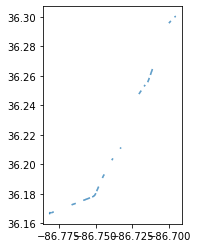

In [84]:
Route56_JunetoJuly_Morning_Trimmedq80.plot();